In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import rankdata
import time
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['lgb-noaug-pdf200', 'santander-customer-transaction-prediction', 'lgb-without-argu-0405', 'lgb-2-leaves-augment', 'lgb-argu-0407', 'nffm-0405-xdeepfm', 'list-of-fake-samples-and-public-private-lb-e2795a', 'lgb-2-leaves-augment-mine', 'no-training-challenge']


In [2]:
# oof=pd.read_csv("../input/lgb-2-leaves-augment/lgb_oof.csv")
# oof.head()

,ID_code,target,predict
0,train_0,0,0.013415
1,train_1,0,0.567439
2,train_2,0,0.007940
3,train_3,0,0.328857
4,train_4,0,0.159580


In [ ]:
# oof['bins']=pd.qcut(oof['predict'],100,labels=False)
# oof.head()

In [ ]:
# temp=oof.groupby(['bins'])['target'].agg({"mean"})
# temp=temp.reset_index()
# bins=80
# plt.plot(temp[temp.bins>bins]['bins'],temp[temp.bins>bins]['mean'])

In [3]:
result_1=pd.read_csv("../input/lgb-argu-0407/lgb_submission.csv")
result_2=pd.read_csv("../input/lgb-without-argu-0405/lgb_submission.csv")
result_3=pd.read_csv("../input/no-training-challenge/submission.csv")
result_4=pd.read_csv("../input/nffm-0405-xdeepfm/nffm_submission.csv")
result_5=pd.read_csv("../input/lgb-2-leaves-augment/lgb_submission.csv")
result_6=pd.read_csv("../input/lgb-2-leaves-augment-mine/lgb_submission.csv")
result_7=pd.read_csv("../input/lgb-noaug-pdf200/lgb_submission.csv")

In [4]:
result_1['index_1']=pd.DataFrame(rankdata(result_1['target'].tolist()))/len(result_1)
result_2['index_2']=pd.DataFrame(rankdata(result_2['target'].tolist()))/len(result_2)
result_3['index_3']=pd.DataFrame(rankdata(result_3['target'].tolist()))/len(result_3)
result_4['index_4']=pd.DataFrame(rankdata(result_4['target'].tolist()))/len(result_4)
result_5['index_5']=pd.DataFrame(rankdata(result_5['target'].tolist()))/len(result_5)
result_6['index_6']=pd.DataFrame(rankdata(result_6['target'].tolist()))/len(result_6)
result_7['index_7']=pd.DataFrame(rankdata(result_7['target'].tolist()))/len(result_7)

In [5]:
result_1.head()

,ID_code,target,index_1
0,test_0,0.000000,0.250003
1,test_1,0.000000,0.250003
2,test_2,0.000000,0.250003
3,test_3,0.200877,0.932820
4,test_4,0.000000,0.250003


In [6]:
pri_lb=np.load("../input/list-of-fake-samples-and-public-private-lb-e2795a/private_LB.npy")
pub_lb=np.load("../input/list-of-fake-samples-and-public-private-lb-e2795a/public_LB.npy")
df_test_new=result_1.iloc[list(pri_lb)+list(pub_lb),:][['ID_code']]
df_test_new.head()

,ID_code
131072,test_131072
131074,test_131074
3,test_3
131082,test_131082
11,test_11


In [7]:
df_test_new['real']=1
df_test_new.head()

,ID_code,real
131072,test_131072,1
131074,test_131074,1
3,test_3,1
131082,test_131082,1
11,test_11,1


In [9]:
result_avg=pd.merge(result_1,result_2,on='ID_code')
result_avg=pd.merge(result_avg,result_3,on='ID_code')
result_avg=pd.merge(result_avg,result_4,on='ID_code')
result_avg=pd.merge(result_avg,result_5,on='ID_code')
result_avg=pd.merge(result_avg,result_6,on='ID_code')
result_avg=pd.merge(result_avg,result_7,on='ID_code')

In [10]:
result_avg=result_avg.merge(df_test_new,on='ID_code',how='left')
result_avg.head()

,ID_code,target_x,index_1,target_y,index_2,target_x,index_3,target_y,index_4,target_x,index_5,target_y,index_6,target,index_7,real
0,test_0,0.000000,0.250003,0.00000,0.250003,0.101102,0.758700,0.00000,0.250003,0.133169,0.743105,0.120510,0.746480,0.000000,0.250003,NaN
1,test_1,0.000000,0.250003,0.00000,0.250003,0.101462,0.848800,0.00000,0.250003,0.288001,0.883990,0.264953,0.865115,0.000000,0.250003,NaN
2,test_2,0.000000,0.250003,0.00000,0.250003,0.101464,0.849275,0.00000,0.250003,0.252864,0.864260,0.177270,0.808770,0.000000,0.250003,NaN
3,test_3,0.200877,0.932820,0.17914,0.925610,0.101766,0.902195,0.08497,0.820735,0.279868,0.879760,0.397517,0.913310,0.215853,0.937075,1.0
4,test_4,0.000000,0.250003,0.00000,0.250003,0.100261,0.442835,0.00000,0.250003,0.064258,0.569895,0.042941,0.548770,0.000000,0.250003,NaN


In [11]:
result_avg.fillna(0,inplace=True)
result_avg.real.value_counts()

1.0    100000
0.0    100000
Name: real, dtype: int64

In [12]:
index_list=[]
for i in result_avg.columns:
    if 'index_' in i:
        index_list.append(i)
result_avg['target']=0.0
for i in index_list:
    result_avg['target']+=result_avg[i]/len(index_list)

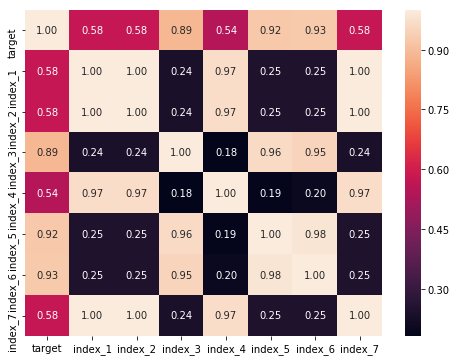

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,6))
result_realtest=result_avg.loc[result_avg['real']==1]
sns.heatmap(result_avg[['ID_code','target']+index_list].iloc[:,1:].corr(),annot=True,fmt=".2f")

In [22]:
#result_avg['target']=(result_avg['index_1']*0.899+result_avg['index_2']*0.899+result_avg['index_3']*0.894+result_avg['index_4']*0.842+result_avg['index_5']*0.901*2)/(0.899+0.899+0.894+0.842+2*0.901)
result_avg['target']=(result_avg['index_4']*0.842+result_avg['index_5']*0.901+result_avg['index_6']*0.901)/(0.842+0.901*2)

In [15]:
result_avg.head()

,ID_code,target_x,index_1,target_y,index_2,target_x,index_3,target_y,index_4,target_x,index_5,target_y,index_6,target,index_7,real
0,test_0,0.000000,0.250003,0.00000,0.250003,0.101102,0.758700,0.00000,0.250003,0.133169,0.743105,0.120510,0.746480,0.250002,0.250003,0.0
1,test_1,0.000000,0.250003,0.00000,0.250003,0.101462,0.848800,0.00000,0.250003,0.288001,0.883990,0.264953,0.865115,0.250002,0.250003,0.0
2,test_2,0.000000,0.250003,0.00000,0.250003,0.101464,0.849275,0.00000,0.250003,0.252864,0.864260,0.177270,0.808770,0.250002,0.250003,0.0
3,test_3,0.200877,0.932820,0.17914,0.925610,0.101766,0.902195,0.08497,0.820735,0.279868,0.879760,0.397517,0.913310,0.880809,0.937075,1.0
4,test_4,0.000000,0.250003,0.00000,0.250003,0.100261,0.442835,0.00000,0.250003,0.064258,0.569895,0.042941,0.548770,0.250002,0.250003,0.0


In [ ]:
result=result_avg[['ID_code','target']]
ymd=time.strftime("%Y%m%d")
hms=time.strftime("%H%M%S")
name="blend_all_{0}_{1}.csv".format(ymd,hms)
result.to_csv(name,encoding='utf-8',index=None)